# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import os, re, string
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Building Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Reading Data

In [2]:
data = pd.read_csv(r'D:\Courses language programming\LLM - Transformer - NLP\NLP - Complete Course\Data\SMSSpamCollection.txt', sep='\t', names=['labels', 'message'])
data.head(4)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [3]:
data['message'].values[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
data.isnull().sum()

labels     0
message    0
dtype: int64

# Text Preprocessing

In [5]:
punc = list(string.punctuation)
lemma = WordNetLemmatizer()

def text_process(data):
    data = re.sub('[^a-zA-Z]', ' ', data)
    data = data.lower()
    data = data.split()
    data = ' '.join([word for word in data if (word not in punc) or (word not in stopwords.words('english'))])
    return data

In [6]:
data['new_message'] = data['message'].apply(text_process)
data.head()

,labels,message,new_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [7]:
data['new_message'].values[0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

# Ham = 0
# Spam = 1

In [8]:
def Label_Encoder(label):
    if label == 'ham': label = 0
    else: label = 1
    return label

In [9]:
data['labels'] = data['labels'].apply(Label_Encoder)
data.head()

,labels,message,new_message
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


# Visulize Labels

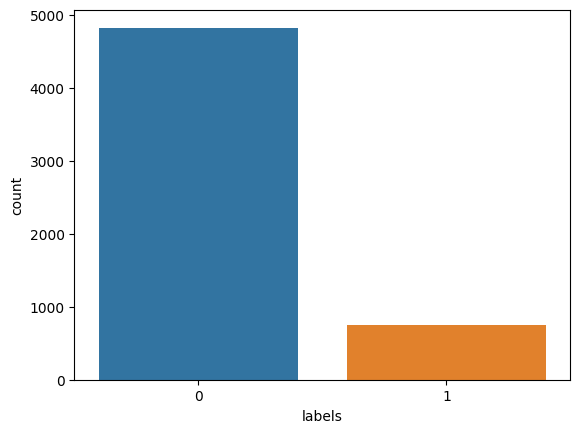

In [10]:
sns.countplot(x='labels', data=data)
plt.show()

# Feature Extraction

## 1 - Using Bag of Words

In [11]:
bag_of_words = CountVectorizer()
X_bow = bag_of_words.fit_transform(data['new_message']).toarray()
X_bow[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
Y_bow = data['labels'].values
Y_bow[:2]

array([0, 0], dtype=int64)

## 2 - Using TF-IDF

In [13]:
TF_IDF = TfidfVectorizer()
X_TFIDF = TF_IDF.fit_transform(data['new_message']).toarray()
X_TFIDF[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
Y_TFIDF = data['labels'].values
Y_TFIDF[:2]

array([0, 0], dtype=int64)

# Splitting Data

In [15]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, Y_bow, train_size=0.7)
x_train_TFIDF, x_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(X_TFIDF, Y_TFIDF, train_size=0.7)

# Building Model

## MultinomialNB

In [16]:
model_bow = MultinomialNB()
model_bow.fit(x_train_bow, y_train_bow)

print('THe Training Score is --> ', model_bow.score(x_train_bow, y_train_bow))
print('THe Testing Score is --> ', model_bow.score(x_test_bow, y_test_bow))

THe Training Score is -->  0.9928205128205129
THe Testing Score is -->  0.9742822966507177


In [17]:
model_tfidf = MultinomialNB()
model_tfidf.fit(x_train_TFIDF, y_train_TFIDF)

print('THe Training Score is --> ', model_tfidf.score(x_train_TFIDF, y_train_TFIDF))
print('THe Testing Score is --> ', model_tfidf.score(x_test_TFIDF, y_test_TFIDF))

THe Training Score is -->  0.9669230769230769
THe Testing Score is -->  0.9515550239234449


## RandomForest

In [18]:
model_bow_rf = RandomForestClassifier()
model_bow_rf.fit(x_train_bow, y_train_bow)

print('THe Training Score is --> ', model_bow_rf.score(x_train_bow, y_train_bow))
print('THe Testing Score is --> ', model_bow_rf.score(x_test_bow, y_test_bow))

THe Training Score is -->  1.0
THe Testing Score is -->  0.9736842105263158


In [19]:
model_tfidf_rf = RandomForestClassifier()
model_tfidf_rf.fit(x_train_TFIDF, y_train_TFIDF)

print('THe Training Score is --> ', model_tfidf_rf.score(x_train_TFIDF, y_train_TFIDF))
print('THe Testing Score is --> ', model_tfidf_rf.score(x_test_TFIDF, y_test_TFIDF))

THe Training Score is -->  1.0
THe Testing Score is -->  0.9712918660287081
